# LR实现线性预测



### 任务
基于generated_data.csv数据，建立线性回归模型，预测 x= 3.5 对应的 y 值 ， 评估模型表现

In [3]:
#第一步；数据加载（load the data）
import pandas as pd
data = pd.read_csv('generated_data.csv')

In [4]:
print(data.head()) #数据的少部分头部展示
print(type(data), data.shape)  #展示数据类型和维度（几行，几列）


   x   y
0  1   7
1  2   9
2  3  11
3  4  13
4  5  15
<class 'pandas.core.frame.DataFrame'> (10, 2)


In [5]:
#第二部数据赋值
x = data.loc[: , 'x']  # 这里的loc用于选择所有行以及名为'x'的列
y = data.loc[: , 'y']  # 这里的loc用于选择所有行以及名为'y'的列
print(x , y)





0     1
1     2
2     3
3     4
4     5
5     6
6     7
7     8
8     9
9    10
Name: x, dtype: int64 0     7
1     9
2    11
3    13
4    15
5    17
6    19
7    21
8    23
9    25
Name: y, dtype: int64


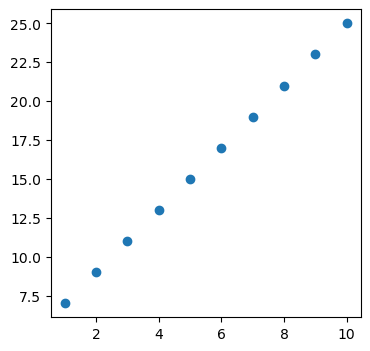

In [6]:
#第三步 展示数据（visualize the data）,以后可以根据数据图来选择模型类型，这里是线性模型
from matplotlib import pyplot as plt #导入绘图工具
plt.figure( figsize=( 4,4) ) #创建一张空白画布,并设置size
plt.scatter(x,y) #根据x和y坐标在画布上标出很多小点
plt.show() #打开窗户，让你看到完整的散点图


In [7]:
#第四步；建立线性回归的模型（set up the linear regression model）

from sklearn.linear_model import LinearRegression #从 scikit-learn 库中导入用于线性回归的工具。
lr_model = LinearRegression()  #创建一个线性回归模型的实例，准备好用于训练和预测。

In [8]:
#以下是把数据从series 转换成 numpy 的 array，并且变维度为从一到二

import numpy as np #导入NumPy库以进行科学计算
x = np.array(x) #将x转换为NumPy数组，方便进行数值运算。
x = x.reshape(-1,1) #将x重塑为二维数组，每行一个元素
y = np.array(y) #将y转换为NumPy数组。
y = y.reshape(-1,1) #将y重塑为二维数组，每行一个元素。
print(type(x) , x.shape , type(y) , y.shape) #打印出x和y的类型和形状，帮助确认数据格式是否正确。


<class 'numpy.ndarray'> (10, 1) <class 'numpy.ndarray'> (10, 1)


In [9]:
#模型训练，拟合

lr_model.fit(x,y) #使用 x 和 y 数据训练线性回归模型 lr_model。

LinearRegression()

In [10]:
#第五步；模型预测

y_predict = lr_model.predict(x) #使用训练好的线性回归模型 lr_model 对 x 数据进行预测，生成预测值 y_predict
print(y_predict) #打印出预测值 y_predict
print(y) #打印出实际值 y，用于对比模型预测效果

# 预测的y 和 现实y 一样


[[ 7.]
 [ 9.]
 [11.]
 [13.]
 [15.]
 [17.]
 [19.]
 [21.]
 [23.]
 [25.]]
[[ 7]
 [ 9]
 [11]
 [13]
 [15]
 [17]
 [19]
 [21]
 [23]
 [25]]


In [11]:
#x = 3.5 时 ， y 对应的值

y_3 = lr_model.predict([[3.5]]) #使用模型预测 x 值为 3.5 时的 y 值。
print(y_3)
#在 predict 方法中，输入的数据需要是一个二维数组，即使只有一个特征值。
#这是因为模型在预测时需要按照训练时的数据格式进行处理。
#即使只有一个特征，也需要以二维数组的形式传递，以便与模型的期望输入匹配。
#因此，对于单个特征值，需要使用双重括号 [[]] 来表示一个包含一个元素的二维数组。

#根据之前的图也可以发现y确实是无限接近12

[[12.]]


In [12]:
#a/b 打印

a = lr_model.coef_ #获取了线性回归模型（lr_model）的系数
b = lr_model.intercept_ #截距（b）
print(a,b)

#根据excel的公式表示法和图形法也发现了a和b预测出来的正确
# y = ax + b = 2x + 5

[[2.]] [5.]


In [13]:
#第六步；评估模型表现

#根据MSE 和 R方 来 评估模型表现

from sklearn.metrics import mean_squared_error , r2_score  #从 sklearn.metrics 模块中导入 mean_squared_error 和 r2_score 函数。
mse = mean_squared_error( y , y_predict) #使用 mean_squared_error 函数计算预测值 y_predict 和实际值 y 之间的均方误差
r2 = r2_score( y , y_predict) #使用 r2_score 函数计算预测值 y_predict 和实际值 y 之间的决定系数
print(mse , r2) 

#在输出中发现，模型拟合的是完美的


0.0 1.0


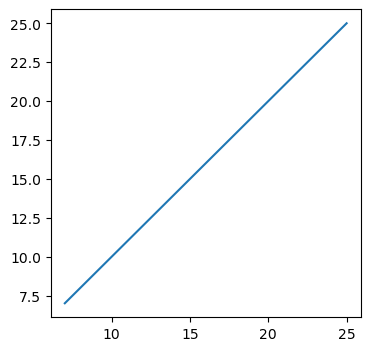

In [14]:
#画图对比y' 和 y，可视化模型（通过人眼判断也可以）‘
plt.figure(figsize = (4,4))  #创建一个大小为 4x4 的图形窗口
plt.plot(y , y_predict)  #绘制 y 和 y_predict 之间的关系图（plot()；绘制折线图的函数）
plt.show()  #显示图形。

#输出发现模型拟合的非常好

#### MSE 越小越好，R2 分数越接近1越好

##### y' vs y 集中度越高越好 （越接近直线分布）

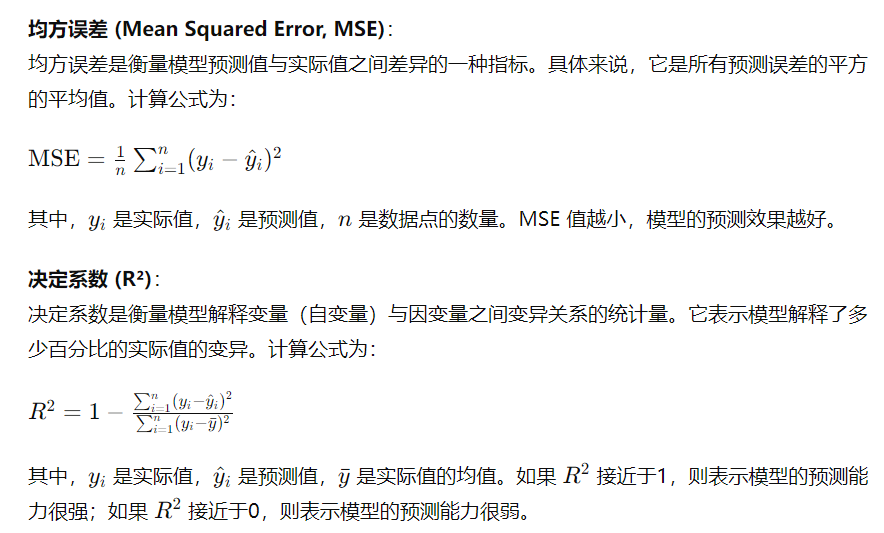
                

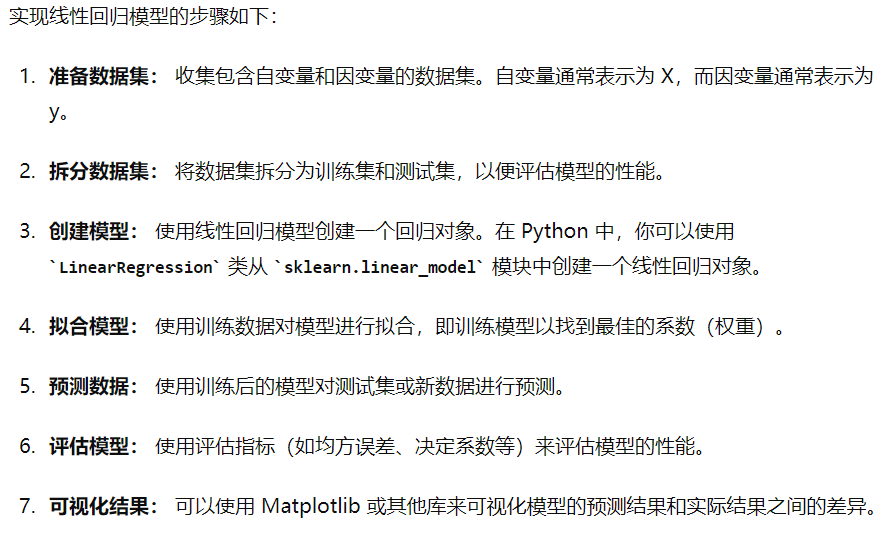